### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Friday, Feb 12th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

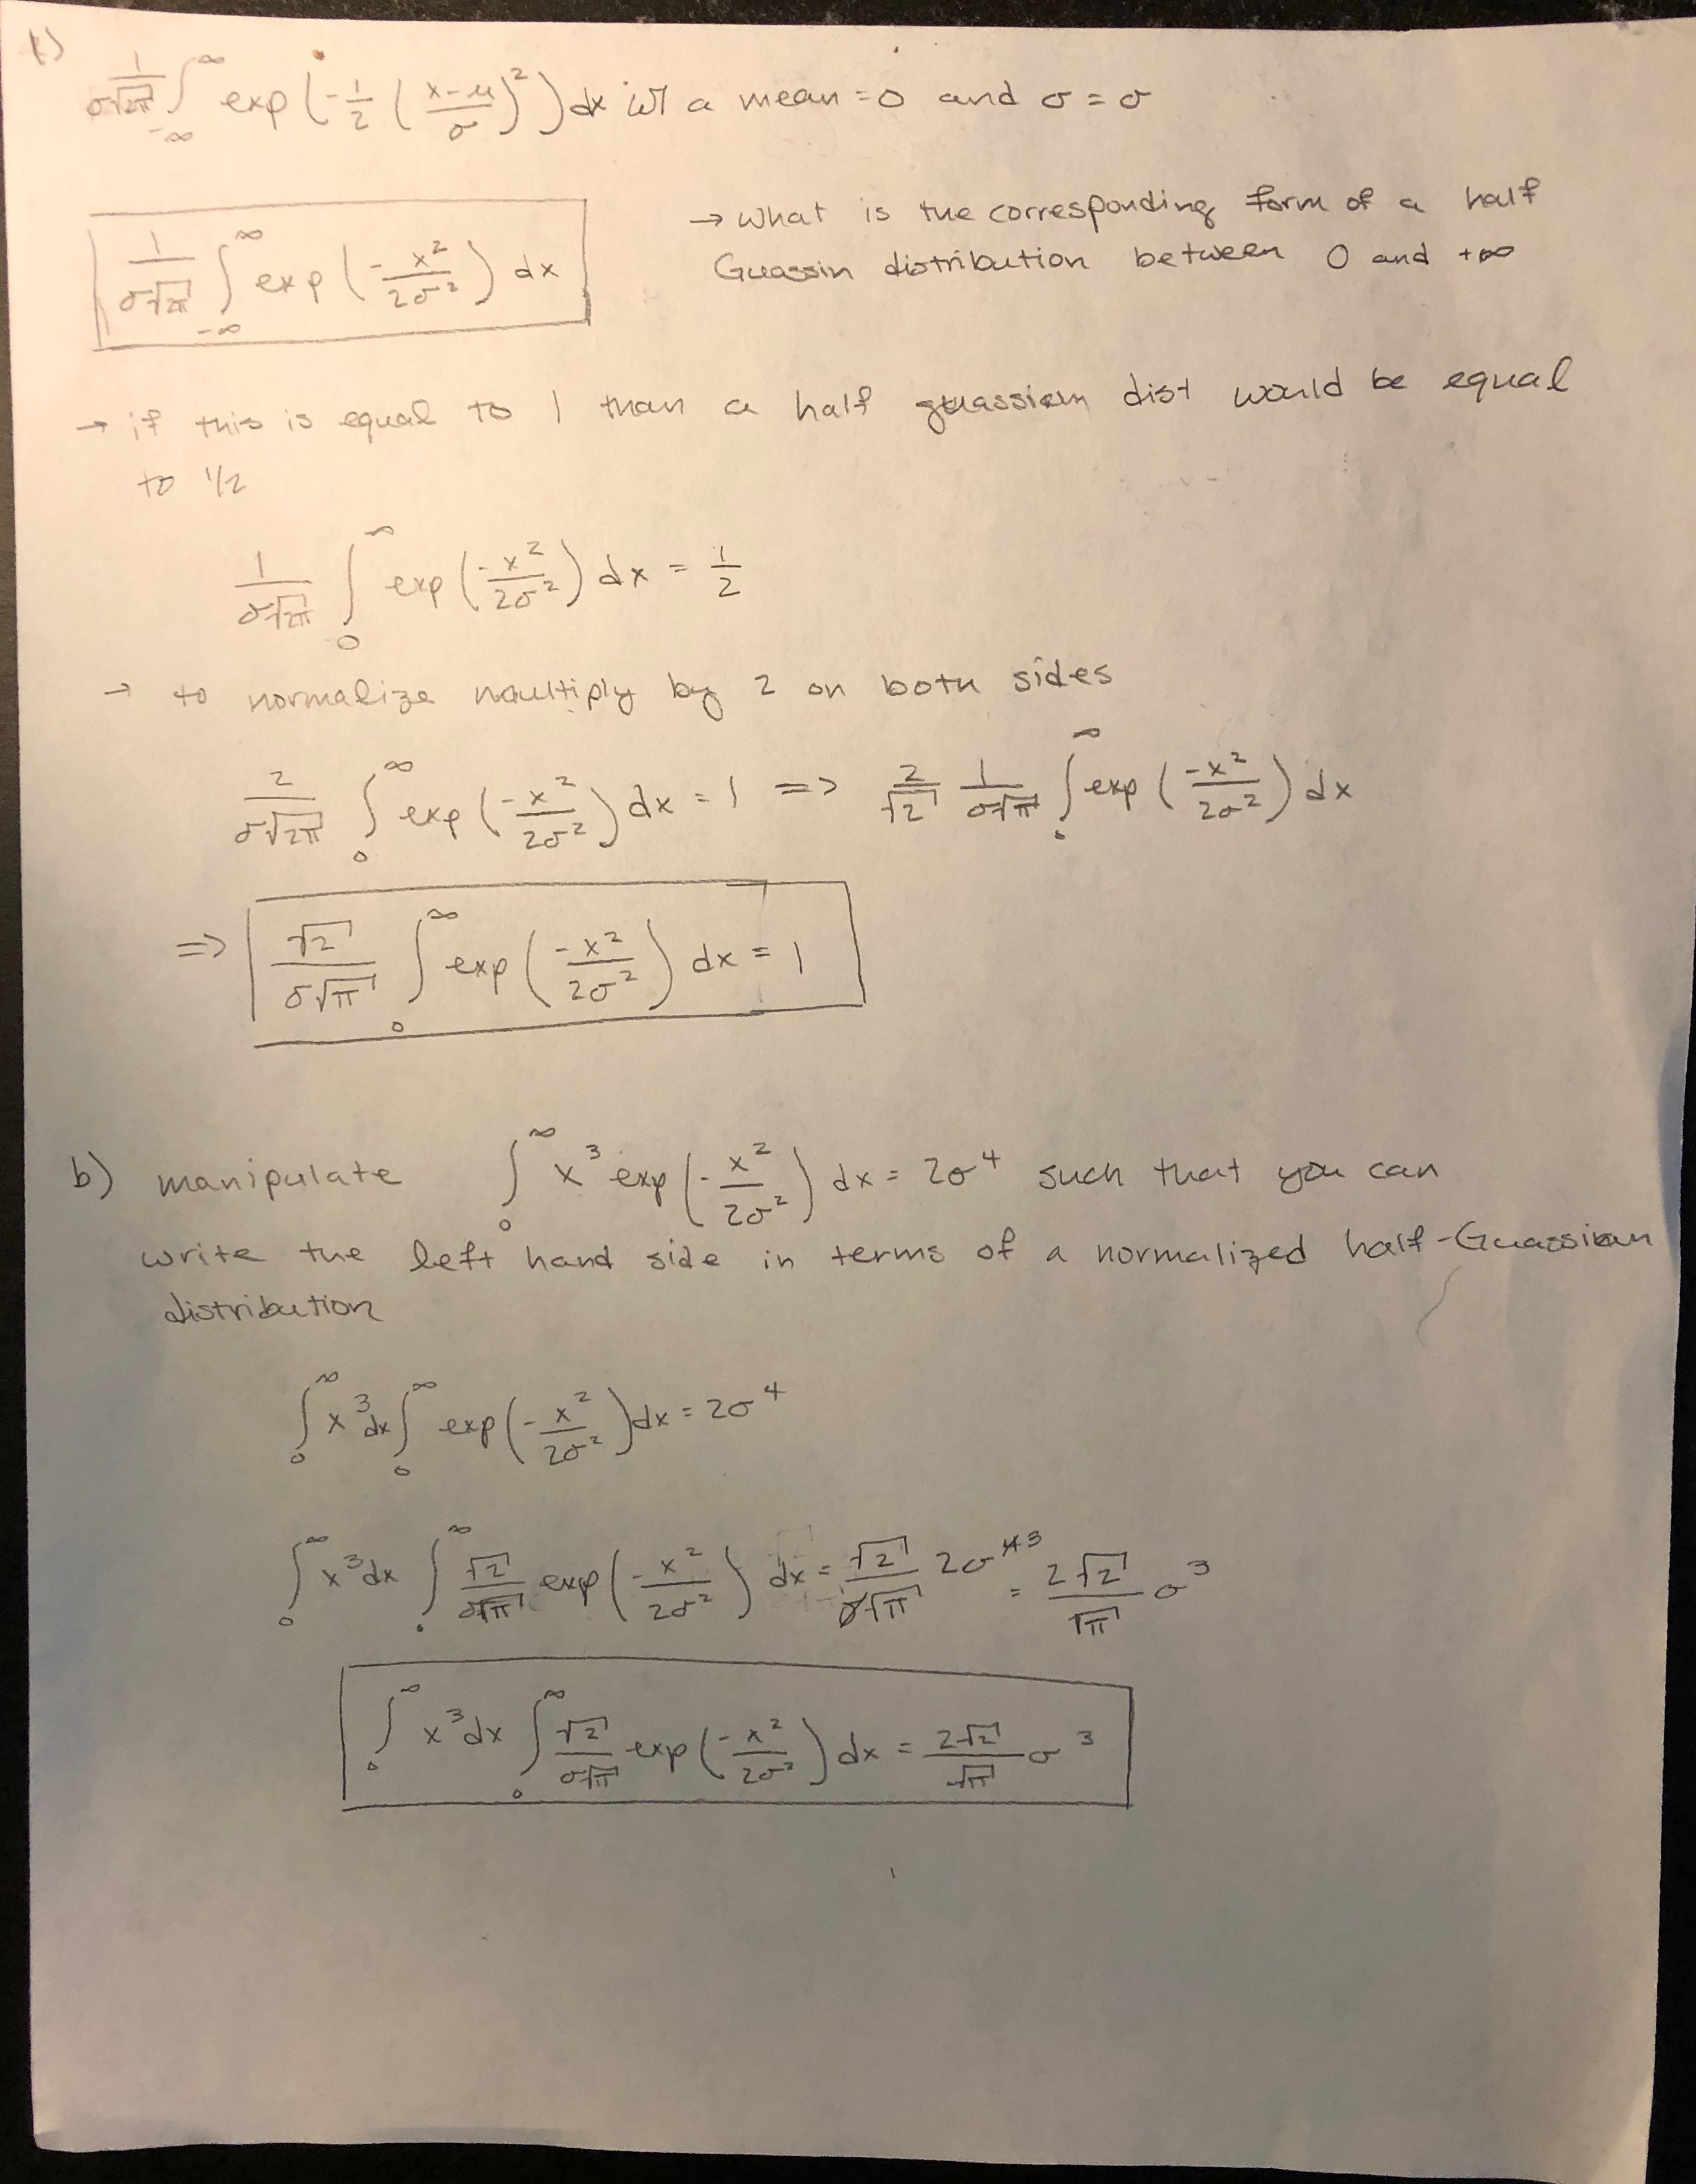

The value calculated from monte carlo integration: 44.29881327868597
The value calculated from the right hand side of the equation: 43.08576628335474


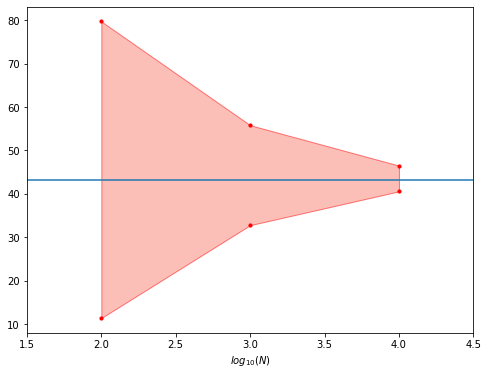

In [57]:
# IMPORTS
###########
###########
import scipy.stats
from scipy.stats import norm as norm
import numpy as np
import matplotlib.pyplot as plt

# CODE
########
########

#CLD creating the normal distibution with sigma=3
mu = 0
sigma = 3
distG = norm(mu, sigma)

#CLD randomly drawing 1e5 samples
N = 100000
rand_draws = distG.rvs(N)

#CLD creating the mask of only positive values
mask = rand_draws > 0
positive_rand_draws = rand_draws[mask]

#CLD performing monte carlo integration
monte_carlo_value = 2/N * np.sum((positive_rand_draws**3)) #CLD multiplying by a factor 2 as the distribution I'm 
#CLD drawing from is not a normalized half guassian but isntead a normalized guassian. Monte Carlo requires a normalized
#CLD pdf so, as I'm only taking half the sample with the masking I'm implementing, multiply the funciton by 2 to 
#CLD normalize

#CLD the actual mathematical value of the right hand side
right_hand_side = ((2*(sigma**3)*np.sqrt(2)))/(np.sqrt(np.pi))

#CLD comparing the two caluclated values
print('The value calculated from monte carlo integration: '+str(monte_carlo_value))
print('The value calculated from the right hand side of the equation: '+str(right_hand_side))

#CLD repeating the above 100 times for n = 10^2, 10^3, 10^4 samples using a for loop, keeping track in arrays
n1 = 100
n2 = 1000
n3 = 10000
integral_n1 = np.zeros((100,))
integral_n2 = np.zeros((100,))
integral_n3 = np.zeros((100,))

for i in range(100):
    #CLD math for first sample
    n1_samples = distG.rvs(n1)
    n1_mask = n1_samples > 0
    n1_mask_samples = n1_samples[n1_mask]
    n1_integration = 2/n1 * np.sum(n1_mask_samples**3)
    integral_n1[i] = n1_integration

    #CLD math for second sample
    n2_samples = distG.rvs(n2)
    n2_mask = n2_samples > 0
    n2_mask_samples = n2_samples[n2_mask]
    n2_integration = 2/n2 * np.sum(n2_mask_samples**3)
    integral_n2[i] = n2_integration
    
    #CLD math for third sample
    n3_samples = distG.rvs(n3)
    n3_mask = n3_samples > 0
    n3_mask_samples = n3_samples[n3_mask]
    n3_integration = 2/n3 * np.sum(n3_mask_samples**3)
    integral_n3[i] = n3_integration
    
#CLD finding the max and min integration value for all of these n's
n1_max = np.max(integral_n1)
n2_max = np.max(integral_n2)
n3_max = np.max(integral_n3)

n1_min = np.min(integral_n1)
n2_min = np.min(integral_n2)
n3_min = np.min(integral_n3)

#CLD plotting these ranges vs log10N
log_n1 = np.log10(n1)
log_n2 = np.log10(n2)
log_n3 = np.log10(n3)

fig,ax = plt.subplots(figsize=(8,6))
ax.fill_between((log_n1,log_n2,log_n3), (n1_min, n2_min, n3_min), (n1_max, n2_max, n3_max), alpha=0.5, color='salmon', ec='r')
ax.scatter((log_n1, log_n1), (n1_min, n1_max), c='r', s=10)
ax.scatter((log_n2, log_n2), (n2_min, n2_max), c='r', s=10)
ax.scatter((log_n3, log_n3), (n3_min, n3_max), c='r', s=10)
ax.plot(x_grid, np.full((1000,), right_hand_side)) #CLD the exact mathematical value
ax.set_xlim(log_n1-0.5, log_n3+0.5)
ax.set_xlabel(r'$log_{10}(N)$');

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

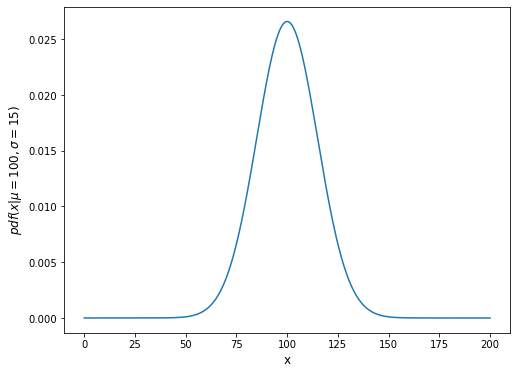

10 random draws from this distribution: [124.0443149  113.51915227 124.95403159  97.26470229  93.80812396
  83.10588237 113.38489023  80.34934357  61.70543187 105.53202054]
The pdf of this distribution at x = 145: 0.0002954565607958672


In [5]:
#CLD creating a guassin distribution with mu = 100 and sigma = 15
distG = norm(100, 15)

#CLD creating 10 random draws
rand_draws = distG.rvs(10)

#CLD finding the pdf of x=145
x_pdf = distG.pdf(145)

#CLD creating an xgrid to plot distribution
xgrid = np.linspace(0, 200, 1000)

#CLD getting the pdf of this xgrid with the created gaussian object to plot the pdf/distribution
distG_pdf = distG.pdf(xgrid)

#CLD plotting the guassian distribution
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(xgrid, distG_pdf);
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel(r'$pdf(x|\mu=100,\sigma=15)$', fontsize=12)
plt.show(fig)

#CLD printing out the 10 random draws and pdf at x=145
print('10 random draws from this distribution: '+str(rand_draws))
print('The pdf of this distribution at x = 145: '+str(x_pdf))

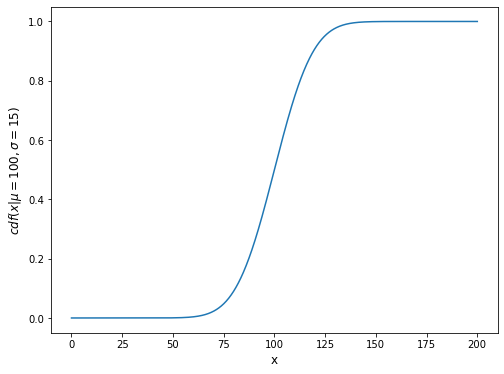

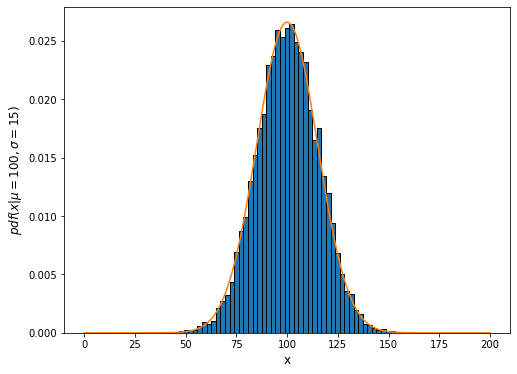

In [6]:
#CLD creating the cdf for the same xrange as the pdf
distG_cdf = distG.cdf(xgrid)

#CLD plotting the cdf guassian distribution
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(xgrid, distG_cdf);
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel(r'$cdf(x|\mu=100,\sigma=15)$', fontsize=12)


#CLD taking 10,000 random samples from this ppf distribution
u = np.random.uniform(0,1,10000)
x_sample = distG.ppf(u)

#CLD plotting the histogram of these randomly sampled x values and plotting original pdf over
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(x_sample, bins=50,ec='k', density=True);
ax.plot(xgrid, distG_pdf)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel(r'$pdf(x|\mu=100,\sigma=15)$', fontsize=12);

In [13]:
#CLD the cdf finds the probability that X will take on a value less than or equal to x. This probability should be equal
#CLD to the fraction of people that have that value or less, ie if cdf(5) = .25 than 1/4 of people have an iq of 
#CLD 5 or less. Meaning 3/4 of people have an iq of more than five (has to be true because add to 1 due to normalization)
amount_at_or_below = distG.cdf(145)
amount_above = 1 - amount_at_or_below
print('The fraction of people with an IQ of more than 145: '+str(amount_above))


The fraction of people with an IQ of more than 145: 0.0013498980316301035


In [7]:
#CLD the incidence level of one in a million is M=4.9, ivezic pg83
#CLD erf(M/sqrt(2)) should be the incidence level where this probability is true and the number that corresponds to 
#CLD this quantile can be found with ppf funciton
quantile_value = scipy.special.erf(4.9 / np.sqrt(2))
one_in_a_million_pt = norm.ppf(quantile_value, loc=100, scale=15)
print('The IQ with a chance of one in a million people having it is: '+str(one_in_a_million_pt))

The IQ with a chance of one in a million people having it is: 171.43016375548802


## Problem 3
done - cld

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

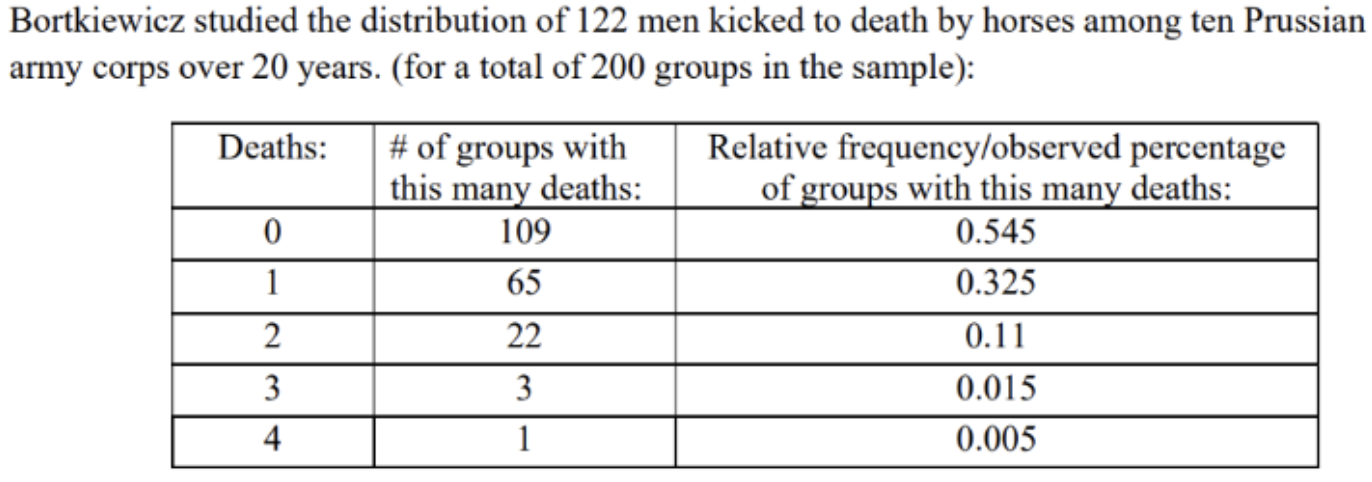

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

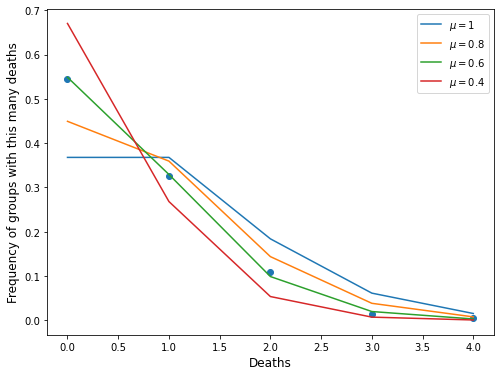

In [8]:
#CLD making an array of the first column
x = np.array([0,1,2,3,4])

#CLD making an array of the third column
y = np.array([0.545, 0.325, 0.11, 0.015, 0.005])

#CLD making different poisson distr with diff mu's
pmf1 = scipy.stats.poisson.pmf(x, mu=1)

pmf2 = scipy.stats.poisson.pmf(x, mu=0.8)

pmf3 = scipy.stats.poisson.pmf(x, mu=0.6)

pmf4 = scipy.stats.poisson.pmf(x, mu=0.4)

#CLD plotting this data
fig,ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Deaths', fontsize=12)
ax.set_ylabel('Frequency of groups with this many deaths', fontsize=12)
ax.scatter(x,y);
ax.plot(x, pmf1, label=r'$\mu=1$');
ax.plot(x, pmf2, label=r'$\mu=0.8$');
ax.plot(x, pmf3, label=r'$\mu=0.6$');
ax.plot(x, pmf4, label=r'$\mu=0.4$');
ax.legend()
plt.show();

In [9]:
#CLD to find the mean I am going to make a data table with the number of deaths occuring at the right frequency
#CLD I am going to do this by creating a data table based off of the first and second columns
#CLD (number of deaths occuring as many times as the # of groups with this death number)
#CLD and then finding the mean of this data set
zero_array = np.zeros((109,))
one_array = np.full((65,),1)
two_array = np.full((22,),2)
three_array = np.full((3,),3)
four_array = np.full((1,),4)

#CLD creating one array of all data pts
data_array = np.append(zero_array, one_array)
data_array = np.append(data_array, two_array)
data_array = np.append(data_array, three_array)
data_array = np.append(data_array, four_array)

#CLD checking shape of the final array should be (200,)
print('The shape of this array is: '+str(data_array.shape))

#CLD the mean of this array should be the mean of this distribution
mean_dist = np.mean(data_array)
print('The mean is: '+str(mean_dist))

The shape of this array is: (200,)
The mean is: 0.61


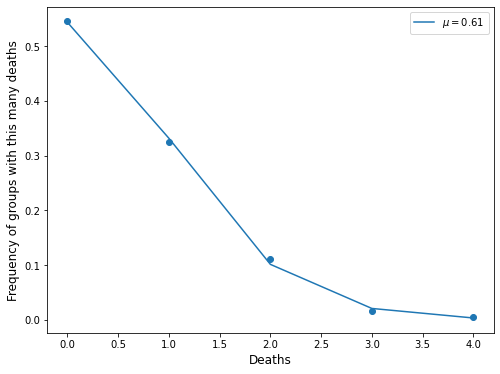

In [83]:
#CLD creating the pmf to overplot onto the data pts
final_pmf = scipy.stats.poisson.pmf(x, mu=0.61)

#CLD plotting the 0.61 over the distribution
fig,ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Deaths', fontsize=12)
ax.set_ylabel('Frequency of groups with this many deaths', fontsize=12)
ax.scatter(x,y)
ax.plot(x, final_pmf, label=r'$\mu=0.61$')
ax.legend()
plt.show();